## Imports

In [1]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm


import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [2]:
DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_91_glove_filtered_full.csv"

TRADING_STRATEGY_FILEPATH = './Trading Strategy'

## Inspecting the Datasets

In [8]:
DATASET_FILEPATHS = ["./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"]

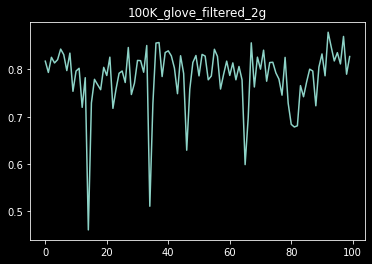

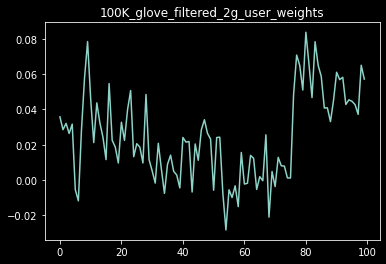

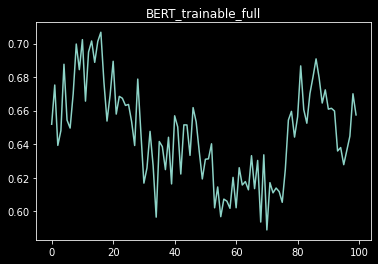

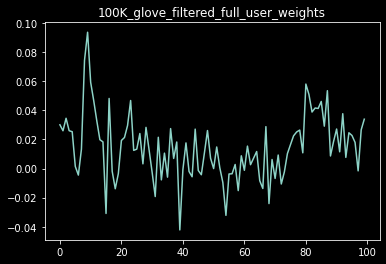

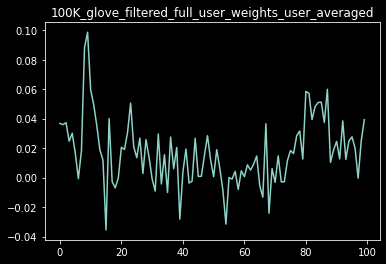

In [9]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    plt.title(filepath[38:-4])
    plt.plot(df['Bitcoin'][1200:1300].values)
    plt.show()

In [10]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    #BTC price data of the next hour standarized
    Y = pd.DataFrame(df['Open']).astype(float)
    #Y = dataset_standarization(Y)

    #Textual data ('Bitcoin' topic popularity) of the last hour standarized
    X = pd.DataFrame(df['Bitcoin_median']).astype(float)
    #X = dataset_standarization(X)
    Y.index = X.index

    X = sm.add_constant(X)

    model = sm.OLS(Y, X, missing = 'drop').fit()
    print(filepath[38:-4])
    print(model.summary())

100K_glove_filtered_2g
                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.716
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.190
Time:                        15:57:21   Log-Likelihood:                -13248.
No. Observations:                1428   AIC:                         2.650e+04
Df Residuals:                    1426   BIC:                         2.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5495.

## Import Sentiment values

In [3]:
df = pd.read_csv(DATASET_FILEPATH, index_col = 0)
format1 = "%Y-%m-%d %H"
df.index = [datetime.strptime(i, format1) for i in df.index]
df

,Bitcoin,Bitcoin_median,Open
2017-09-13 01:00:00,0.814122,0.891900,4128.005439
2017-09-13 02:00:00,0.812894,0.850564,4066.801167
2017-09-13 03:00:00,0.853220,0.846102,3999.225167
2017-09-13 04:00:00,0.838326,0.846102,3959.409667
2017-09-13 05:00:00,0.782210,0.815073,3995.046667
...,...,...,...
2019-01-22 18:00:00,0.706585,0.819227,3584.926897
2019-01-22 19:00:00,0.889864,0.935381,3585.858545
2019-01-22 20:00:00,0.687378,0.781042,3585.295893
2019-01-22 21:00:00,0.767968,0.853416,3579.910755


In [4]:
# 2nd dataset used BERT (trainable) with open and close prices
DATASET_FILEPATH2 = "./Data Preprocessed/BERT_full.csv"
df2 = pd.read_csv(DATASET_FILEPATH2, index_col = 0)
format = "%Y-%m-%d %H:%M:%S"
df2.index = [datetime.strptime(i, format) for i in df2.index]
df2

,Bitcoin,Bitcoin_median,Open,date,place
2017-09-13 01:00:00,0.614933,0.660034,4128.005439,2017-09-13,0
2017-09-13 02:00:00,0.620224,0.673658,4066.801167,2017-09-13,1
2017-09-13 03:00:00,0.582891,0.604611,3999.225167,2017-09-13,2
2017-09-13 04:00:00,0.599718,0.646221,3959.409667,2017-09-13,3
2017-09-13 05:00:00,0.562789,0.566217,3995.046667,2017-09-13,4
...,...,...,...,...,...
2019-01-22 18:00:00,0.658323,0.707379,3584.926897,2019-01-22,1408
2019-01-22 19:00:00,0.642840,0.699695,3585.858545,2019-01-22,1409
2019-01-22 20:00:00,0.658940,0.686578,3585.295893,2019-01-22,1410
2019-01-22 21:00:00,0.654965,0.703751,3579.910755,2019-01-22,1411


### Anlytics on Median vs mean

In [8]:
df['Open'] = df2['open']
df['Close'] = df2['close']

KeyError: 'open'

In [11]:
df['date'] = df.index.map(lambda x : str(x)[:-8])
df['place'] = range(0,1413)
df

,Bitcoin,Bitcoin_median,Open,date,place
2017-09-13 01:00:00,0.614933,0.660034,4128.005439,2017-09-13,0
2017-09-13 02:00:00,0.620224,0.673658,4066.801167,2017-09-13,1
2017-09-13 03:00:00,0.582891,0.604611,3999.225167,2017-09-13,2
2017-09-13 04:00:00,0.599718,0.646221,3959.409667,2017-09-13,3
2017-09-13 05:00:00,0.562789,0.566217,3995.046667,2017-09-13,4
...,...,...,...,...,...
2019-01-22 18:00:00,0.658323,0.707379,3584.926897,2019-01-22,1408
2019-01-22 19:00:00,0.642840,0.699695,3585.858545,2019-01-22,1409
2019-01-22 20:00:00,0.658940,0.686578,3585.295893,2019-01-22,1410
2019-01-22 21:00:00,0.654965,0.703751,3579.910755,2019-01-22,1411


In [12]:
df.to_csv(DATASET_FILEPATH2)

In [13]:
k = pd.DataFrame(df.groupby(['date']).Bitcoin_median.apply(np.mean).values)
index = df.groupby(['date']).place.first()
l = pd.DataFrame(df.groupby(['date']).Bitcoin.apply(np.mean).values)

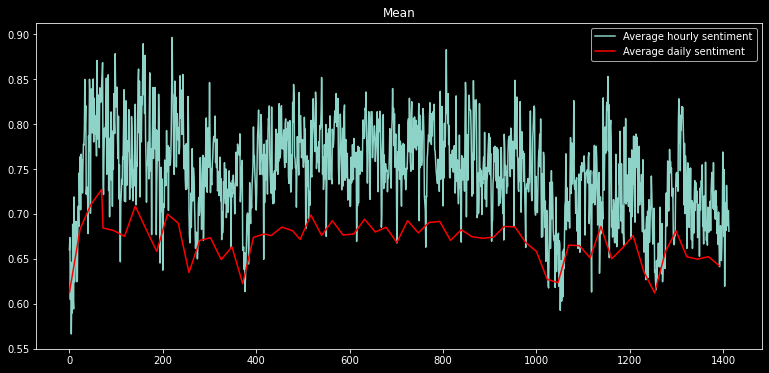

In [14]:
fig = plt.figure(figsize=(13, 6))
plt.title("Mean")
x_axis = range(0,1413)

plt.plot(x_axis,df.Bitcoin_median, label = 'Average hourly sentiment')
plt.plot(index,df.groupby(['date']).Bitcoin.apply(np.mean),color = "red", label = 'Average daily sentiment')
plt.legend()
plt.show()

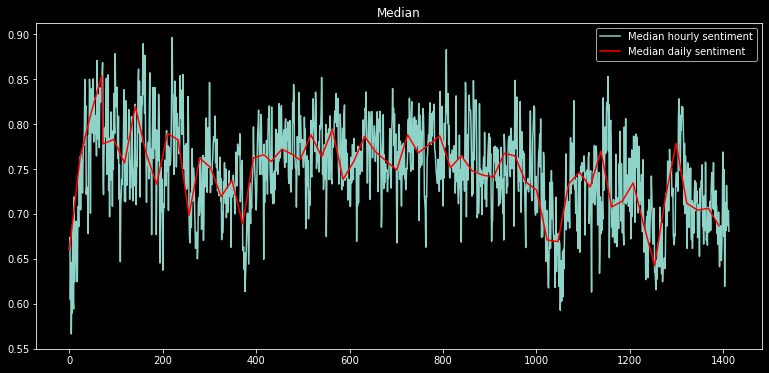

In [15]:
fig = plt.figure(figsize=(13, 6))
plt.title("Median")
x_axis = range(0,1413)

plt.plot(x_axis,df.Bitcoin_median, label = 'Median hourly sentiment')
plt.plot(index,df.groupby(['date']).Bitcoin_median.apply(np.median),color = "red", label = 'Median daily sentiment')
plt.legend()
plt.show()

## Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [177]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(TRADING_STRATEGY_FILEPATH)
sys.path.append('./Data Preprocessed')
from custom_trading_engine import customNLP
from signals import *
from strategies import *
from data_import import BTC_total

In [178]:
# BTC_total()

In [179]:
# take btc prices
btc = pd.read_csv('./BTC_full2_1.csv', index_col = 0)
format = "%Y-%m-%d %H"
btc.index = [datetime.strptime(i, format) for i in btc.index]

#add date columsn to the btc price and sentiment datasets
btc['date'] = btc.index
df['date'] = df.index

# take the intersection of the two datasets to find the final dataset
df_final = pd.merge(df, btc, how = 'inner', on = ['date'])
df_final.index = df_final['date']
df_final

,Bitcoin,Bitcoin_median,Open,date,open,close,volume
date,,,,,,,
2017-09-13 01:00:00,0.814122,0.891900,4128.005439,2017-09-13 01:00:00,4135.00,4110.97,1.210418e+06
2017-09-13 02:00:00,0.812894,0.850564,4066.801167,2017-09-13 02:00:00,4101.49,4034.86,4.198789e+06
2017-09-13 03:00:00,0.853220,0.846102,3999.225167,2017-09-13 03:00:00,4026.00,3945.01,7.790633e+06
2017-09-13 04:00:00,0.838326,0.846102,3959.409667,2017-09-13 04:00:00,3945.01,4004.40,4.982865e+06
2017-09-13 05:00:00,0.782210,0.815073,3995.046667,2017-09-13 05:00:00,4009.99,3984.97,3.957893e+06
...,...,...,...,...,...,...,...
2019-01-22 18:00:00,0.706585,0.819227,3584.926897,2019-01-22 18:00:00,3591.44,3586.57,8.050906e+05
2019-01-22 19:00:00,0.889864,0.935381,3585.858545,2019-01-22 19:00:00,3586.74,3579.28,2.155876e+06
2019-01-22 20:00:00,0.687378,0.781042,3585.295893,2019-01-22 20:00:00,3581.87,3587.78,4.808546e+05


In [264]:
# import the spreads from Kraken historical data
df1 = pd.read_csv('./Data/bitcoinity_data.csv', index_col = False)
format2 = "%Y-%m-%d %H:%M:%S"
df1.index = df1['Time'].apply(lambda x: str(x)[:-4])
df1.index = [datetime.strptime(i, format2) for i in df1.index]
df1.columns = ['date','spreads']
# spreads are in % values
df1['spreads'] = df1['spreads']/100
df1

#algo.add_spreads(df1['spreads'])

,date,spreads
2014-02-15,2014-02-15 00:00:00 UTC,0.013573
2014-02-16,2014-02-16 00:00:00 UTC,0.011486
2014-02-17,2014-02-17 00:00:00 UTC,0.012024
2014-02-18,2014-02-18 00:00:00 UTC,0.009083
2014-02-19,2014-02-19 00:00:00 UTC,0.008272
...,...,...
2021-06-19,2021-06-19 00:00:00 UTC,0.000045
2021-06-20,2021-06-20 00:00:00 UTC,0.000046
2021-06-21,2021-06-21 00:00:00 UTC,0.000090
2021-06-22,2021-06-22 00:00:00 UTC,0.000113


In [265]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
signal = Signal_mean(df_final['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = -1)
strategy = BitcoinNLPStrategy(repos = 1)
strategy.add_signal(signal)
algo = customNLP(1, df_final[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\signals.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return self.pos * (self.data[datetime] - mean) / stdv


Opening LONG position of  1.0  USD at  4103.394724548955  $
Opening SHORT position of  2.3870431414589914  USD at  4024.1303328707136  $
Opening LONG position of  0.8711083018920334  USD at  3946.84205551955  $
Opening LONG position of  2.0767586410896177  USD at  4011.852232114199  $
Opening SHORT position of  2.455937826352443  USD at  3981.1503019930583  $
Opening SHORT position of  0.26625022836870693  USD at  4021.131726065296  $
Opening LONG position of  2.131826605930555  USD at  3937.687806276074  $
Opening SHORT position of  1.247531799425229  USD at  3927.57519373626  $
Opening SHORT position of  0.8988037399700821  USD at  3936.7409352048207  $
Opening LONG position of  1.9930606222986351  USD at  3856.7102178862465  $
Opening SHORT position of  0.8615076644218927  USD at  3820.2250701023017  $
Opening LONG position of  1.8530290525336501  USD at  3879.9410012123126  $
Opening SHORT position of  2.3378878618141785  USD at  3835.008201653012  $
Opening LONG position of  1.730

Opening LONG position of  2.7852738462765996  USD at  5671.912686211794  $
Opening SHORT position of  1.1068331195936207  USD at  5673.105444461686  $
Opening SHORT position of  1.5301772187366036  USD at  5695.557432043046  $
Opening LONG position of  3.7241199290278857  USD at  5687.808354837447  $
Opening SHORT position of  4.3734912115704025  USD at  5722.48782142158  $
Opening LONG position of  1.0487443529521228  USD at  5707.025207845552  $
Closing SHORT position of  -0.5506803152435826  USD at  5754.3  $
Opening LONG position of  1.163249555085319  USD at  6052.415100780694  $
Opening SHORT position of  0.303101236464591  USD at  6096.475196975131  $
Opening SHORT position of  2.3271405882008027  USD at  6033.820425507612  $
Opening LONG position of  3.270823171220303  USD at  6077.09503038976  $
Opening SHORT position of  2.573720580955651  USD at  6070.545637755803  $
Opening LONG position of  2.9072862252924736  USD at  6103.455636194337  $
Opening SHORT position of  2.00213

Opening LONG position of  2.3246743373874272  USD at  16189.523730664789  $
Opening SHORT position of  1.8444276159725717  USD at  16140.851529439275  $
Opening SHORT position of  0.9231575181720894  USD at  16408.702239763486  $
Opening LONG position of  1.6312526349944672  USD at  16352.076060352894  $
Opening SHORT position of  2.3750106402452884  USD at  16562.783618262863  $
Opening SHORT position of  1.2427772813114126  USD at  16563.45332000529  $
Opening LONG position of  4.198026050734576  USD at  16689.646266429707  $
Opening SHORT position of  0.45611631856317625  USD at  16502.540448089934  $
Opening LONG position of  3.38812514770751  USD at  16179.389221188298  $
Opening SHORT position of  5.200762312928187  USD at  16316.193439373495  $
Opening LONG position of  3.5867659078638137  USD at  16464.49608304524  $
Opening SHORT position of  3.262051663287653  USD at  16402.694915178465  $
Opening LONG position of  0.6283031102857959  USD at  16447.31843963839  $
Opening SHOR

Opening SHORT position of  1.8207973234902826  USD at  7318.146259957792  $
Opening LONG position of  2.539819512721849  USD at  7302.990038160099  $
Opening SHORT position of  2.7895089081341995  USD at  7356.488433762702  $
Opening LONG position of  2.6036149325243576  USD at  7342.688137812852  $
Opening SHORT position of  2.8990175410973755  USD at  7353.469050062811  $
Opening LONG position of  2.888344301156239  USD at  7388.557496595297  $
Opening LONG position of  1.3145643859384364  USD at  7381.416039514907  $
Opening SHORT position of  3.901034451456364  USD at  7428.903652763738  $
Opening LONG position of  1.3770826323923442  USD at  7462.682620436705  $
Opening SHORT position of  1.1781071623476358  USD at  7427.343971117437  $
Opening SHORT position of  0.6051920642802322  USD at  7396.880189218203  $
Closing SHORT position of  -2.3495708803124753  USD at  7411.59  $
Opening SHORT position of  1.2854379187282783  USD at  6929.674865411408  $
Opening LONG position of  1.7

Opening LONG position of  1.2734164288735061  USD at  8268.237920255333  $
Opening SHORT position of  1.4896357618342662  USD at  8189.514921176725  $
Opening LONG position of  2.0892392235783213  USD at  8221.269979332901  $
Opening SHORT position of  1.1321568840085903  USD at  8224.608985776867  $
Opening SHORT position of  1.6373408608822404  USD at  8227.568485241722  $
Opening LONG position of  0.8210987827408828  USD at  8215.238959661645  $
Opening SHORT position of  1.2633072746738754  USD at  8211.601185764108  $
Opening LONG position of  2.0570114581388133  USD at  8111.371398656651  $
Opening SHORT position of  1.3121715660592197  USD at  8081.623168726545  $
Opening LONG position of  1.6438660343999274  USD at  7977.4087494413525  $
Closing LONG position of  0.5612851094298841  USD at  7989.33  $
Opening LONG position of  1.4458947240167574  USD at  7111.127051954942  $
Opening SHORT position of  3.4700913624240757  USD at  7110.6125141906505  $
Opening LONG position of  1

Opening SHORT position of  0.8314172846434236  USD at  6382.801128243966  $
Opening LONG position of  1.632647536166401  USD at  6376.087769229257  $
Opening SHORT position of  1.3130823675968533  USD at  6381.821257025401  $
Opening LONG position of  3.289644209694026  USD at  6353.714829595884  $
Opening SHORT position of  3.378125207370643  USD at  6360.963998230236  $
Opening LONG position of  1.8308655226488617  USD at  6372.5773079814635  $
Opening LONG position of  0.8511992363906251  USD at  6377.787992625624  $
Opening SHORT position of  1.4429586108681267  USD at  6395.049518476027  $
Opening SHORT position of  2.487666635976466  USD at  6373.06240817374  $
Opening LONG position of  1.4253293206551505  USD at  6372.417286955923  $
Closing SHORT position of  -1.109662393163379  USD at  6303.49  $
Opening SHORT position of  1.466111435225655  USD at  6722.165411392859  $
Opening LONG position of  1.9546964229624932  USD at  6733.855639493958  $
Opening SHORT position of  0.5753

Opening LONG position of  1.9083013275511833  USD at  6443.480850399088  $
Opening SHORT position of  1.2211586488629196  USD at  6444.318730670386  $
Opening LONG position of  0.6610851131763794  USD at  6429.968814517282  $
Opening SHORT position of  0.5762407502258539  USD at  6367.590294961265  $
Opening SHORT position of  0.9978158232471157  USD at  6286.4725208007085  $
Opening LONG position of  1.4522439514464605  USD at  6284.306867379889  $
Opening LONG position of  1.651187216640903  USD at  6227.188261220754  $
Opening SHORT position of  2.5736705227902354  USD at  6248.058310480869  $
Opening LONG position of  4.458906187735978  USD at  6232.509062915144  $
Opening SHORT position of  2.2673921458146022  USD at  6277.013946370056  $
Opening SHORT position of  1.4543379975003647  USD at  6240.259485897455  $
Opening LONG position of  1.9182146748315918  USD at  6260.943347157907  $
Closing LONG position of  0.8453224196285238  USD at  6246.71  $
Opening SHORT position of  1.5

Opening LONG position of  3.0338103063430775  USD at  6441.081254480439  $
Opening SHORT position of  2.90647755901529  USD at  6435.379011497926  $
Opening LONG position of  4.2755457513517605  USD at  6436.801027710041  $
Opening SHORT position of  4.136280141314788  USD at  6429.069345825312  $
Opening SHORT position of  0.7759364471772658  USD at  6433.90908938402  $
Opening SHORT position of  0.7468245798107029  USD at  6433.639103689628  $
Opening LONG position of  2.1248405647102175  USD at  6415.1898827314635  $
Opening SHORT position of  0.8222187234193497  USD at  6420.62979300806  $
Opening SHORT position of  1.8019470724272992  USD at  6422.07971618164  $
Opening LONG position of  2.2289907239713296  USD at  6426.480480917866  $
Opening SHORT position of  0.5454090919314704  USD at  6417.399964145534  $
Closing SHORT position of  -0.1318652058509152  USD at  6411.05  $
Opening LONG position of  1.6119012821161023  USD at  5533.703414447964  $
Opening LONG position of  0.680

Opening SHORT position of  0.6731853792352815  USD at  3540.8054919183364  $
Opening LONG position of  3.9627258904618508  USD at  3528.90309434972  $
Opening SHORT position of  3.2226025479343203  USD at  3518.1980107898285  $
Opening LONG position of  0.5388784053151281  USD at  3520.492157432018  $
Opening LONG position of  0.9145069393802041  USD at  3531.483381775127  $
Opening LONG position of  2.250405387363265  USD at  3503.850303649549  $
Opening SHORT position of  2.442149142723784  USD at  3518.897932806191  $
Opening SHORT position of  1.184034160734889  USD at  3523.137460448158  $
Opening LONG position of  0.46786203426719125  USD at  3560.736640377123  $
Opening LONG position of  1.198739019024615  USD at  3553.115791469526  $
Opening SHORT position of  2.7689804322675386  USD at  3564.0629006334675  $
Opening LONG position of  4.333945916532812  USD at  3590.1899212601584  $
Opening SHORT position of  4.399494878722384  USD at  3581.2709833500367  $
Opening LONG positio

In [266]:
# signal = Signal3(df2['Bitcoin_'])
# strategy = BitcoinNLPStrategy()
# strategy.add_signal(signal)
# algo = customNLP(1, df2[['Open','Close']], strategy)
# #algo.set_stoploss(0.01)
# algo.add_spreads(df1['spreads'])
# algo.run(split = True)

In [114]:
# signal = RandomSignal()
# strategy = BitcoinBNHStrategy()
# strategy.add_signal(signal)
# algo = customNLP(100000, df['Open'], strategy)
# #algo.set_stoploss(0.01)
# algo.run(split = True)

In [140]:
#plot trading history
algo.plot()

KeyboardInterrupt: 

In [116]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [165]:
#a better plotting of trading history
btc['Open'] = btc['open']
algo.plot2(btc)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:307: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sign'] = df['Position USD'].apply(np.sign)
C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change'] = df['Position USD'].diff().fillna(1)
C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:309: UserWarning: Boolean Seri

In [267]:
print(algo.metrics.dropna().info(verbose= True))
algo.metrics.dropna().head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1427 entries, 2017-09-13 02:00:00 to 2019-01-22 22:00:00
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Position USD      1427 non-null   object
 1   Position BTC      1427 non-null   object
 2   Price USD         1427 non-null   object
 3   Cash USD          1427 non-null   object
 4   Portfolio Marked  1427 non-null   object
dtypes: object(5)
memory usage: 66.9+ KB
None


,Position USD,Position BTC,Price USD,Cash USD,Portfolio Marked
2017-09-13 02:00:00,1.0,0.000244,4103.394725,0.0,0.983298
2017-09-13 03:00:00,-1.387043,-0.000349,4024.130333,2.387043,1.008334
2017-09-13 04:00:00,-0.515935,-0.000129,3946.842056,1.515935,1.000282
2017-09-13 05:00:00,1.560824,0.000389,4011.852232,-0.560824,0.988869
2017-09-13 06:00:00,-0.895114,-0.000228,3981.150302,1.895114,0.975853


In [268]:
p = figure(x_axis_type="datetime", title="Daily Spread (Kraken)", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Spread %'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
df1['year'] = df1['date'].apply(lambda x : int(x[:4]))
df_spreads = df1[df1['year']>2016][df1['year']<2020]
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(df_spreads.index.values, df_spreads['spreads'].values*100, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

<ipython-input-268-21d5d29ff736>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_spreads = df1[df1['year']>2016][df1['year']<2020]


In [269]:
p = figure(x_axis_type="datetime", title="Portfolio Value", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [270]:
# Portfolio value per trade

p = figure(title="Portfolio Value", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

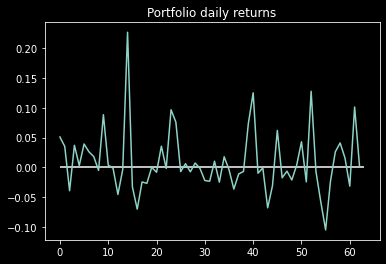

In [271]:
algo.metrics['date'] =  algo.metrics.index.map(lambda x : str(x)[:-9])
algo.metrics['hour'] =  algo.metrics.index.map(lambda x : str(x)[-8:])

plt.title("Portfolio daily returns")
daily_returns = algo.metrics.groupby(['date'])['Portfolio Marked'].first().pct_change().dropna()
plt.hlines(0 ,0 ,daily_returns.shape[0])
plt.plot(daily_returns.values)

In [272]:
algo.metrics.groupby(['date'])['Portfolio Marked'].first().pct_change().dropna().index

Index(['2017-09-21', '2017-09-26', '2017-10-07', '2017-10-10', '2017-10-12',
       '2017-10-13', '2017-10-16', '2017-10-21', '2017-11-13', '2017-11-16',
       '2017-11-20', '2017-11-30', '2017-12-01', '2017-12-03', '2017-12-14',
       '2017-12-27', '2018-01-18', '2018-01-21', '2018-01-26', '2018-03-15',
       '2018-03-20', '2018-04-03', '2018-04-08', '2018-04-16', '2018-05-08',
       '2018-05-10', '2018-05-11', '2018-05-13', '2018-05-19', '2018-05-20',
       '2018-05-22', '2018-05-29', '2018-06-08', '2018-06-15', '2018-06-17',
       '2018-06-19', '2018-07-02', '2018-07-04', '2018-07-10', '2018-07-17',
       '2018-07-18', '2018-07-21', '2018-07-23', '2018-08-07', '2018-08-13',
       '2018-08-14', '2018-08-23', '2018-08-27', '2018-09-18', '2018-09-20',
       '2018-09-29', '2018-10-15', '2018-10-18', '2018-10-24', '2018-11-16',
       '2018-12-04', '2018-12-07', '2018-12-30', '2019-01-03', '2019-01-04',
       '2019-01-14', '2019-01-15', '2019-01-22'],
      dtype='object', name

In [273]:
p = figure(x_axis_type="datetime", title="Daily Returns", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Return %'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'

daily_returns.index = pd.to_datetime(daily_returns.index)
daily_returns.index

# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.vbar(daily_returns.index.values, width=1, top = daily_returns.values, color='steelblue')

# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [274]:
sr = ((np.mean(daily_returns)-0.035/365)/np.std(daily_returns)*math.sqrt(365))
sr

3.4151454751817183

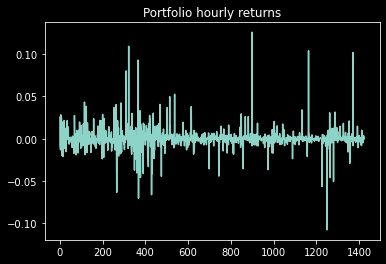

In [275]:
plt.title("Portfolio hourly returns")
returns = algo.metrics['Portfolio Marked'].pct_change().dropna()

plt.plot(returns.values)
plt.savefig('hourly_returns.png')

In [276]:
p = figure(x_axis_type="datetime", title="Hourly Returns", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Return %'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'

returns.index = pd.to_datetime(returns.index)
returns.index

# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.vbar(returns.index.values, width=1, top = returns.values, color='steelblue')

# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [277]:
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

3.342258087332402

In [278]:
#algo.metrics = algo.metrics.fillna(0)
print(algo.metrics.info(verbose = True))
algo.metrics.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1428 entries, 2017-09-13 01:00:00 to 2019-01-22 22:00:00
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Position USD      1427 non-null   object
 1   Position BTC      1427 non-null   object
 2   Price USD         1427 non-null   object
 3   Cash USD          1427 non-null   object
 4   Portfolio Marked  1427 non-null   object
 5   date              1428 non-null   object
 6   hour              1428 non-null   object
dtypes: object(7)
memory usage: 121.5+ KB
None


,Position USD,Position BTC,Price USD,Cash USD,Portfolio Marked,date,hour
2017-09-13 01:00:00,NaN,NaN,NaN,NaN,NaN,2017-09-13,01:00:00
2017-09-13 02:00:00,1.0,0.000244,4103.394725,0.0,0.983298,2017-09-13,02:00:00
2017-09-13 03:00:00,-1.387043,-0.000349,4024.130333,2.387043,1.008334,2017-09-13,03:00:00
2017-09-13 04:00:00,-0.515935,-0.000129,3946.842056,1.515935,1.000282,2017-09-13,04:00:00
2017-09-13 05:00:00,1.560824,0.000389,4011.852232,-0.560824,0.988869,2017-09-13,05:00:00


In [285]:
dates = list(set(algo.metrics.date.values))
hours = list(set(algo.metrics.hour.values))
heatm = pd.DataFrame(columns=sorted(hours), index = sorted(dates))
heatm2 = pd.DataFrame(columns=sorted(hours), index = sorted(dates))
for d in sorted(dates):
    for h in sorted(hours):
        this_datetime = d + " " + h
        if this_datetime in algo.metrics.index and algo.metrics.loc[this_datetime]['Position USD'] != 0:
            heatm2.loc[d][h] = algo.metrics.loc[this_datetime]['Position USD']/abs(algo.metrics.loc[this_datetime]['Position USD'])
            heatm.loc[d][h] = algo.metrics.loc[this_datetime]['Position USD']
        else:
            heatm.loc[d][h] = 0
heatm = heatm.fillna(0)
heatm2 = heatm2.fillna(0)
heatm2

,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2017-09-13,0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,0
2017-09-21,0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,0
2017-09-26,0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0
2017-10-07,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2017-10-10,0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-03,0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2019-01-04,0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,0
2019-01-14,0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,0
2019-01-15,0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,0


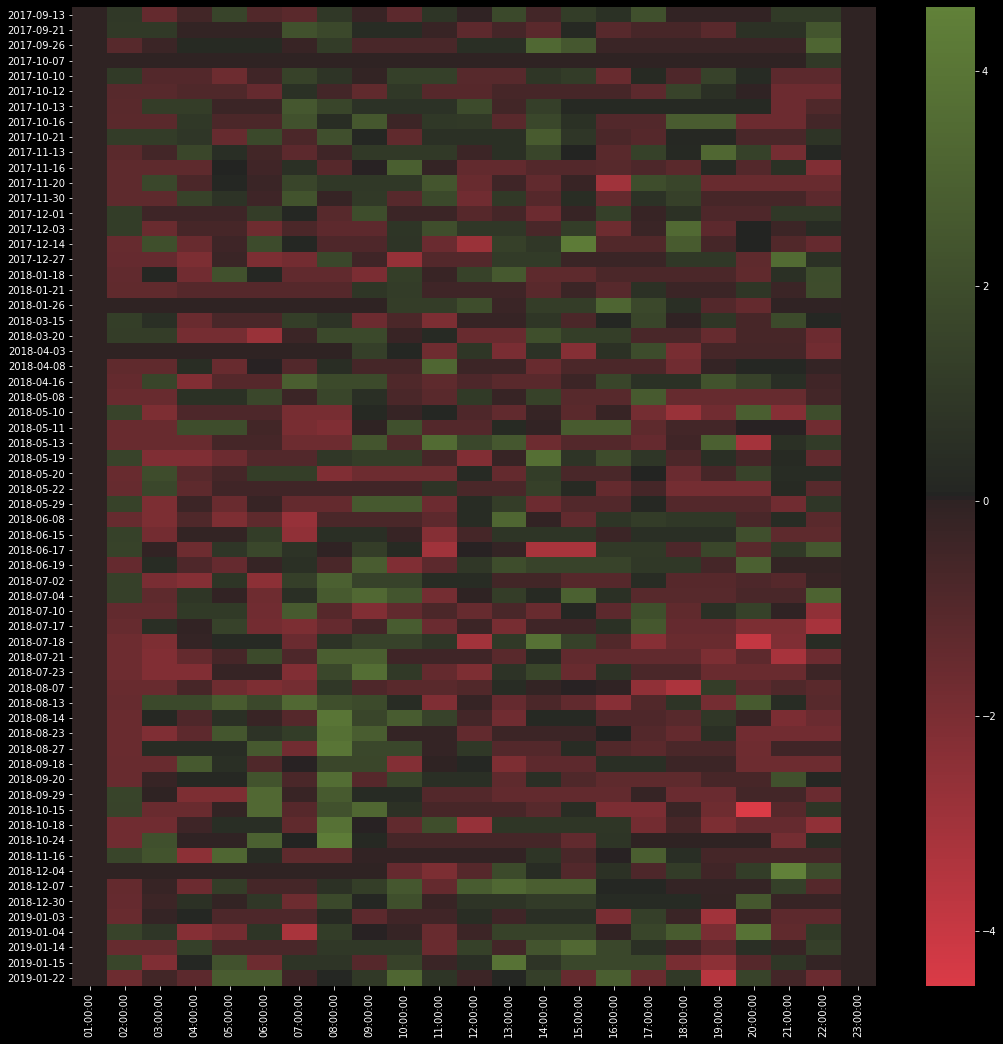

In [286]:
import seaborn as sns
import pandas as pd
import numpy as np

cmap = sns.diverging_palette(10, 110, s=75, l=50, n=9,center = 'dark', as_cmap=True)

fig = plt.figure(figsize=(18, 18))
# Default heatmap
p1 = sns.heatmap(heatm, cmap = cmap)
plt.savefig('heatmap1.png')

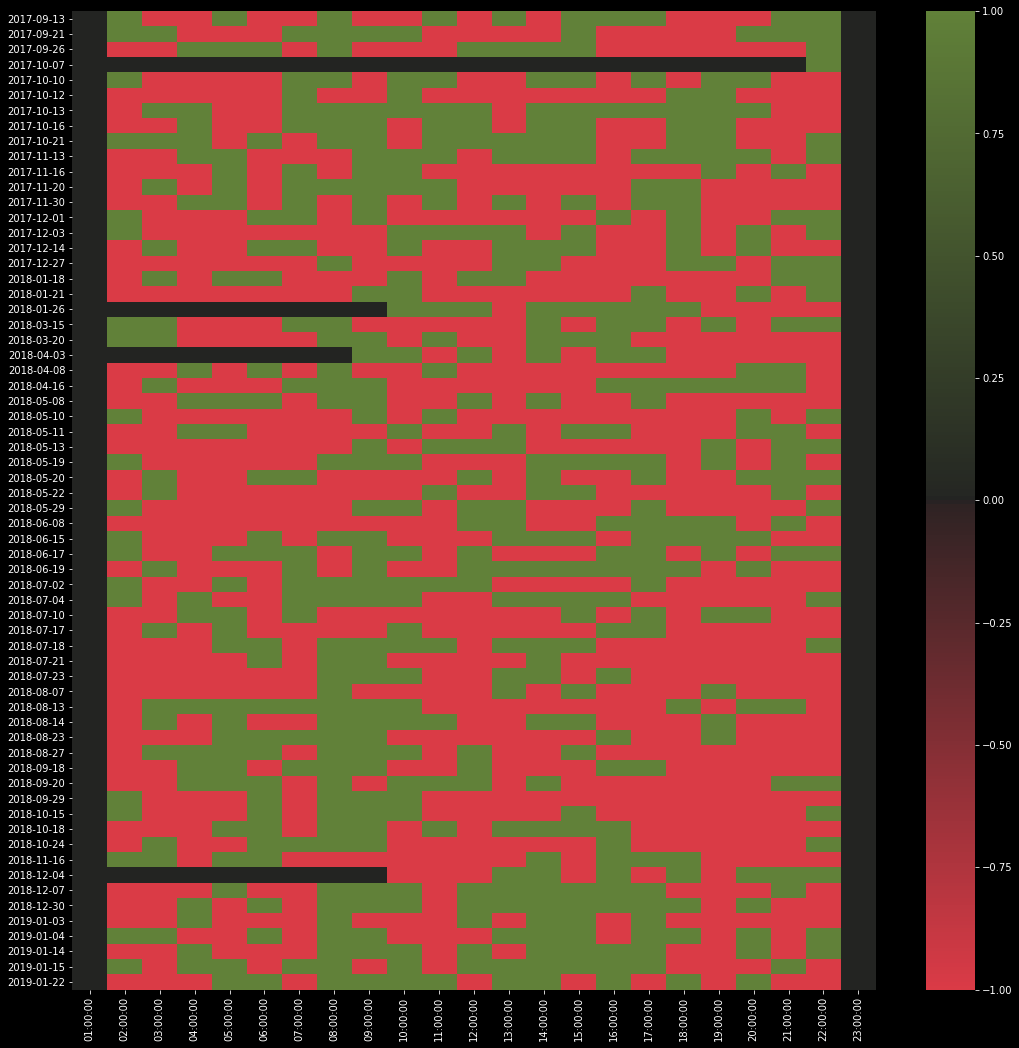

In [287]:
fig = plt.figure(figsize=(18, 18))
# Default heatmap
p1 = sns.heatmap(heatm2, cmap = cmap)
plt.savefig('heatmap2.png')

## Compare Periods

In [81]:
df_final['year'] =  df_final.index.map(lambda x : str(x)[:4])
df_17 = df_final[df_final['year']=='2017']
df_18 = df_final[df_final['year']=='2018']
df_19 = df_final[df_final['year']=='2019']
print(df_17, df_18, df_19)

                      Bitcoin  Bitcoin_median          Open  \
date                                                          
2017-09-13 01:00:00  0.814122        0.891900   4128.005439   
2017-09-13 02:00:00  0.812894        0.850564   4066.801167   
2017-09-13 03:00:00  0.853220        0.846102   3999.225167   
2017-09-13 04:00:00  0.838326        0.846102   3959.409667   
2017-09-13 05:00:00  0.782210        0.815073   3995.046667   
...                       ...             ...           ...   
2017-12-27 19:00:00  0.789274        0.819227  15033.023333   
2017-12-27 20:00:00  0.825048        0.846539  14766.958167   
2017-12-27 21:00:00  0.710272        0.747295  15041.734000   
2017-12-27 22:00:00  0.781089        0.855101  15281.260667   
2017-12-27 23:00:00  0.763905        0.790627  15342.861864   

                                   date      open     close        volume  \
date                                                                        
2017-09-13 01:00:00 2017-0

### 2017

In [103]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
signal = Signal_mean(df_17['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = -1)
strategy = BitcoinNLPStrategy(repos = 1)
strategy.add_signal(signal)
algo = customNLP(1, df_17[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\signals.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return self.pos * (self.data[datetime] - mean) / stdv


Opening LONG position of  1.0  USD at  4103.394724548955  $
Opening SHORT position of  2.3870431414589914  USD at  4024.1303328707136  $
Opening LONG position of  0.8711083018920334  USD at  3946.84205551955  $
Opening LONG position of  2.0767586410896177  USD at  4011.852232114199  $
Opening SHORT position of  2.455937826352443  USD at  3981.1503019930583  $
Opening SHORT position of  0.26625022836870693  USD at  4021.131726065296  $
Opening LONG position of  2.131826605930555  USD at  3937.687806276074  $
Opening SHORT position of  1.247531799425229  USD at  3927.57519373626  $
Opening SHORT position of  0.8988037399700821  USD at  3936.7409352048207  $
Opening LONG position of  1.9930606222986351  USD at  3856.7102178862465  $
Opening SHORT position of  0.8615076644218927  USD at  3820.2250701023017  $
Opening LONG position of  1.8530290525336501  USD at  3879.9410012123126  $
Opening SHORT position of  2.3378878618141785  USD at  3835.008201653012  $
Opening LONG position of  1.730

Opening LONG position of  1.0589193670259103  USD at  8222.774461830022  $
Opening SHORT position of  2.715165335554172  USD at  8199.141551550649  $
Opening LONG position of  4.998391461775887  USD at  8221.714111792488  $
Opening SHORT position of  0.43227180054531056  USD at  8219.714755538886  $
Opening SHORT position of  3.0978672191612464  USD at  8197.282165767456  $
Opening LONG position of  1.9567667338522157  USD at  8242.711043196128  $
Closing LONG position of  0.45648375608033187  USD at  8213.0  $
Opening SHORT position of  1.2706706667100414  USD at  10399.26480252149  $
Opening LONG position of  2.7314036914641715  USD at  10482.75566703566  $
Opening SHORT position of  0.7296009388984921  USD at  10536.143121098656  $
Opening SHORT position of  1.1413154512323382  USD at  10328.747187234654  $
Opening LONG position of  2.7231187619078074  USD at  10110.439498569092  $
Opening SHORT position of  2.509172617870075  USD at  10196.32555796143  $
Opening LONG position of  1

In [104]:
p = figure(x_axis_type="datetime", title="Portfolio Value 2017", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [105]:
# Portfolio value per trade

p = figure(title="Portfolio Value 2017", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

### 2018

In [106]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
signal = Signal_mean(df_18['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = -1)
strategy = BitcoinNLPStrategy(repos = 1)
strategy.add_signal(signal)
algo = customNLP(1, df_18[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

Opening SHORT position of  1.0  USD at  11541.598311034384  $
Opening LONG position of  1.0616549091561789  USD at  11735.374567572913  $
Opening SHORT position of  1.3951929228996132  USD at  11448.441434490069  $
Opening LONG position of  3.000408240101051  USD at  11142.937110238809  $
Opening SHORT position of  1.574158056205508  USD at  11096.172318777439  $
Opening SHORT position of  1.1059774262523105  USD at  11223.259846096127  $
Opening LONG position of  2.0028847367788587  USD at  11226.394648351015  $
Opening SHORT position of  1.1926294300534126  USD at  11396.78089432726  $
Opening LONG position of  1.3092920591251538  USD at  11591.572656800985  $
Opening SHORT position of  2.0750422645488165  USD at  11756.295878025581  $
Opening LONG position of  1.402258004115894  USD at  11899.638133474855  $
Opening LONG position of  1.0543072946842837  USD at  11581.596974568896  $
Opening SHORT position of  1.0755864229444285  USD at  11292.270492221916  $
Closing LONG position of

Opening LONG position of  1.0348478397509893  USD at  9323.879663953756  $
Opening SHORT position of  0.8993730580676216  USD at  9284.935331108916  $
Opening LONG position of  1.725517993889642  USD at  9341.292053732297  $
Opening SHORT position of  0.3305247703815575  USD at  9332.738768483294  $
Opening LONG position of  0.23980653865347454  USD at  9361.134777064077  $
Opening SHORT position of  0.7496346438578403  USD at  9335.14843767535  $
Opening SHORT position of  0.41363599468448753  USD at  9329.709184395355  $
Opening LONG position of  0.9338686159269982  USD at  9366.275482604668  $
Opening SHORT position of  1.3469160910557352  USD at  9349.986400667105  $
Opening SHORT position of  0.7852197227993027  USD at  9142.334907801373  $
Opening LONG position of  0.8404960550814518  USD at  9124.842346904496  $
Opening LONG position of  3.8267896433732735  USD at  9091.977836386235  $
Opening SHORT position of  4.24039198475602  USD at  9087.062495794353  $
Opening LONG positio

Opening SHORT position of  2.586872556496928  USD at  6486.927534129377  $
Opening SHORT position of  0.3847968699465558  USD at  6471.789663456438  $
Opening LONG position of  3.965458551524236  USD at  6524.717523373999  $
Opening SHORT position of  1.5359399765589425  USD at  6504.085120704517  $
Opening LONG position of  2.093849290290647  USD at  6515.9062843138  $
Opening SHORT position of  2.353473150507039  USD at  6515.503514567461  $
Opening LONG position of  1.7915526727658495  USD at  6492.863043911192  $
Opening LONG position of  1.2735658832500176  USD at  6500.904174676685  $
Opening SHORT position of  2.9163383306071236  USD at  6484.1879194897565  $
Closing SHORT position of  -0.791118143365392  USD at  6451.16  $
Opening SHORT position of  1.2208485895133165  USD at  6719.983449094906  $
Opening LONG position of  1.5418665276824544  USD at  6681.229935639512  $
Opening SHORT position of  1.0215408708081468  USD at  6682.029585836876  $
Opening SHORT position of  0.518

Opening LONG position of  0.5687366793429186  USD at  7360.703648980901  $
Opening SHORT position of  1.3082485480194213  USD at  7348.4176960208215  $
Opening SHORT position of  1.5158357873591388  USD at  7412.519388885909  $
Opening LONG position of  1.2758686515360074  USD at  7414.9506771979895  $
Opening LONG position of  2.0974888782776713  USD at  7425.952102537001  $
Closing LONG position of  0.752228199885034  USD at  7407.28  $
Opening SHORT position of  1.3689687350723747  USD at  7532.67292225439  $
Opening SHORT position of  0.731582382291442  USD at  7630.717731641935  $
Opening LONG position of  1.9475662641832636  USD at  7671.178168933512  $
Opening SHORT position of  1.675013765148804  USD at  7682.579696387315  $
Opening LONG position of  3.2456383166020455  USD at  7756.191336403007  $
Opening LONG position of  1.6073715488019693  USD at  7702.3229928746905  $
Opening SHORT position of  2.176398500580479  USD at  7715.524592056494  $
Opening SHORT position of  2.02

Opening SHORT position of  0.7393377303131428  USD at  6322.5635359792195  $
Opening SHORT position of  1.070855840146445  USD at  6307.265293750809  $
Closing SHORT position of  -1.3993270415492864  USD at  6328.73  $
Opening SHORT position of  1.2857948745169456  USD at  6401.45645833093  $
Opening LONG position of  1.0876058015804622  USD at  6385.601644945274  $
Opening LONG position of  0.333948520120377  USD at  6399.463168038657  $
Opening LONG position of  1.8354251295001482  USD at  6391.9623438539265  $
Opening SHORT position of  2.5995289036412395  USD at  6404.1261649211665  $
Opening LONG position of  3.7076159704190603  USD at  6408.544165851638  $
Opening SHORT position of  3.9747351052514457  USD at  6390.507661640638  $
Opening LONG position of  2.251518719125592  USD at  6389.402062532205  $
Opening SHORT position of  0.9363316472178709  USD at  6421.294278087588  $
Opening SHORT position of  1.4964434966637272  USD at  6421.624241823461  $
Opening LONG position of  1

Opening SHORT position of  0.6423626048578941  USD at  3401.363636435308  $
Closing SHORT position of  -1.553423029605512  USD at  3384.59  $
Opening SHORT position of  1.284171378274617  USD at  3738.067738995096  $
Opening LONG position of  0.947493386453663  USD at  3735.5614834623257  $
Opening LONG position of  0.8912111088755401  USD at  3734.201217100133  $
Opening SHORT position of  0.6491669769258422  USD at  3760.5433361847317  $
Opening LONG position of  0.8930798644021938  USD at  3754.0351008959306  $
Opening SHORT position of  2.2586153284579975  USD at  3751.465114544078  $
Opening LONG position of  3.0561974580660114  USD at  3752.734846285011  $
Opening SHORT position of  1.5032609251595161  USD at  3784.8385769190795  $
Opening LONG position of  1.7583528462008169  USD at  3833.7207046282133  $
Opening SHORT position of  2.074278022661901  USD at  3835.128725435035  $
Opening LONG position of  0.9191552871767047  USD at  3836.0011511765956  $
Opening LONG position of 

In [107]:
# Portfolio value per date

p = figure(x_axis_type="datetime", title="Portfolio Value 2018", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [108]:
# Portfolio value per trade

p = figure(title="Portfolio Value 2018", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

### 2019

In [109]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
signal = Signal_mean(df_19['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = -1)
strategy = BitcoinNLPStrategy(repos = 1)
strategy.add_signal(signal)
algo = customNLP(1, df_19[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

Opening SHORT position of  1.0  USD at  3862.794581727327  $
Opening LONG position of  0.8862208901710428  USD at  3865.1955683454644  $
Opening LONG position of  0.18598027100897935  USD at  3875.017767919816  $
Opening SHORT position of  0.6067026016821078  USD at  3863.2044898917384  $
Opening LONG position of  0.6825027653044345  USD at  3849.6320830728673  $
Opening SHORT position of  0.9449783777562453  USD at  3830.8317426633766  $
Opening LONG position of  1.0661227389521917  USD at  3834.308651557688  $
Opening SHORT position of  0.5491564078317439  USD at  3851.1371934418826  $
Opening LONG position of  0.5965857562911634  USD at  3847.981713490619  $
Opening SHORT position of  1.6213444152628473  USD at  3840.659540849133  $
Opening LONG position of  2.181143904067187  USD at  3773.184963575143  $
Opening SHORT position of  1.0696562980545636  USD at  3779.153320667268  $
Opening SHORT position of  1.818909420555084  USD at  3781.3328323707215  $
Opening LONG position of  1.

In [110]:
p = figure(x_axis_type="datetime", title="Portfolio Value 2019", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [111]:
# Portfolio value per trade

p = figure(title="Portfolio Value 2019", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

## Generate Random Strategies

In [91]:
# #best strategy play the opposite (with stoploss)
# cash = []
# for stop in range(1, 50):
#     signal = Signal2(df['Bitcoin'])
#     strategy = BitcoinNLPStrategy2()
#     strategy.add_signal(signal)
#     algo = customNLP(100000, df['Open'], strategy)
#     algo.set_stoploss(stop/1000)
    
#     algo.run(split = True, verbose = False)
#     cash.append(algo.cash)
# #plt.plot(list(algo.metrics['Portfolio Marked']))

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

## Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)